In [1]:
%matplotlib inline
import gluonbook as gb
import math
from mxnet import nd
import numpy as np

In [2]:
def gd(eta):
    x = 10
    results = [x]
    for i in range(10):
        x -= eta * 2*x #f(x) = x*x
        results.append(x)
    print('epoch 10, x:', x)
    return results

res = gd(0.2)
res

epoch 10, x: 0.06046617599999997


[10,
 6.0,
 3.5999999999999996,
 2.1599999999999997,
 1.2959999999999998,
 0.7775999999999998,
 0.46655999999999986,
 0.2799359999999999,
 0.16796159999999993,
 0.10077695999999996,
 0.06046617599999997]

In [6]:
def show_trace(res):
    n = max(abs(min(res)), abs(max(res)), 10)
    f_line = np.arange(-n,n,0.1)
    gb.set_figsize()
    gb.plt.plot(f_line, [x * x for x in f_line])
    gb.plt.plot(res, [x * x for x in res], '-o')
    gb.plt.xlabel('x')
    gb.plt.ylabel('f(x)')

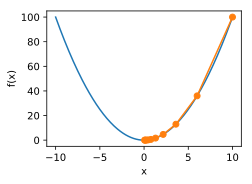

In [7]:
show_trace(res)

epoch 10, x: 61.917364224000096


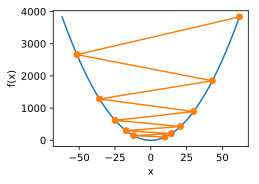

In [8]:
show_trace(gd(1.1))

In [12]:
def train_2d(trainer):
    x1, x2,s1, s2 = -5,-2, 0,0 #s1和s2s是自变量状态
    results = [(x1,x2)]
    for i in range(20):
        x1,x2,s1,s2 = trainer(x1,x2,s1,s2)
        results.append((x1,x2))
    print('epoch %d,x1 %f, x2 %f' % (i + 1, x1,x2))
    return results
def show_trace_2d(f, results):
    gb.plt.plot(*zip(*results), '-o', color = '#ff7f0e')
    x1, x2 = np.meshgrid(np.arange(-5.5, 1.0, 0.1), np.arange(-3.0, 1.0, 0.1))
    gb.plt.contour(x1, x2, f(x1, x2), colors='#1f77b4')
    gb.plt.xlabel('x1')
    gb.plt.ylabel('x2')  
         

epoch 20,x1 -0.057646, x2 -0.000073


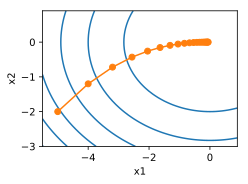

In [13]:
eta = 0.1
def f_2d(x1,x2):
    return x1**2 + 2*x2**2
def gd_2d(x1,x2,s1,s2):
    return (x1 - eta*2*x1, x2-eta*4*x2,0,0)
show_trace_2d(f_2d,train_2d(gd_2d))